In [1]:
import xarray
data = xarray.open_dataset('/g/data/gh5/access_cm_025-picontrol/output000/ocean/ocean.nc',decode_times=False)

In [2]:
data

<xarray.Dataset>
Dimensions:                (nv: 2, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50, time: 6, xt_ocean: 1440, xu_ocean: 1440, yt_ocean: 1080, yu_ocean: 1080)
Coordinates:
  * xt_ocean               (xt_ocean) float64 -279.9 -279.6 -279.4 -279.1 ...
  * yt_ocean               (yt_ocean) float64 -81.08 -80.97 -80.87 -80.76 ...
  * time                   (time) float64 15.5 45.0 74.5 105.0 135.5 166.0
  * nv                     (nv) float64 1.0 2.0
  * xu_ocean               (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ...
  * yu_ocean               (yu_ocean) float64 -81.02 -80.92 -80.81 -80.71 ...
  * st_ocean               (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 ...
  * st_edges_ocean         (st_edges_ocean) float64 0.0 10.07 20.16 30.29 ...
  * sw_ocean               (sw_ocean) float64 10.07 20.16 30.29 40.47 50.71 ...
  * sw_edges_ocean         (sw_edges_ocean) float64 5.034 15.1 25.22 35.36 ...
    geolon_t               (yt_ocean, xt_oc

In [3]:
# U velocity

data['u']

<xarray.DataArray 'u' (time: 6, st_ocean: 50, yu_ocean: 1080, xu_ocean: 1440)>
[466560000 values with dtype=float64]
Coordinates:
  * time      (time) float64 15.5 45.0 74.5 105.0 135.5 166.0
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 -278.8 -278.5 ...
  * yu_ocean  (yu_ocean) float64 -81.02 -80.92 -80.81 -80.71 -80.6 -80.5 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...
    geolon_c  (yu_ocean, xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ...
    geolat_c  (yu_ocean, xu_ocean) float64 -81.02 -81.02 -81.02 -81.02 ...
Attributes:
    long_name: i-current
    units: m/sec
    valid_range: [-10.  10.]
    cell_methods: time: mean
    time_avg_info: average_T1,average_T2,average_DT
    standard_name: sea_water_x_velocity

In [4]:
# 64 bit, so multiply by 8 for bytes then divide by 1024 ** 3 for gigabytes

data['u'].size * 8 / 1024.0**3

3.4761428833007812

In [8]:
%%time
# Operating on a single array is slow, but works

data['u'].mean()

CPU times: user 3.66 s, sys: 10.3 s, total: 13.9 s
Wall time: 14 s


<xarray.DataArray 'u' ()>
array(0.008380663054826449)

In [ ]:
# But more complex operations fill up memory quickly

magnitude = (data['u']**2 + data['v']**2)**0.5

In [11]:
# Let's chunk the data

chunked = data.chunk({'time':1, 'st_ocean':10, 'xt_ocean': 200, 'yt_ocean': 200})
chunked['u']

<xarray.DataArray 'u' (time: 6, st_ocean: 50, yu_ocean: 1080, xu_ocean: 1440)>
dask.array<xarray-..., shape=(6, 50, 1080, 1440), dtype=float64, chunksize=(1, 10, 1080, 1440)>
Coordinates:
  * time      (time) float64 15.5 45.0 74.5 105.0 135.5 166.0
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 -278.8 -278.5 ...
  * yu_ocean  (yu_ocean) float64 -81.02 -80.92 -80.81 -80.71 -80.6 -80.5 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...
    geolon_c  (yu_ocean, xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ...
    geolat_c  (yu_ocean, xu_ocean) float64 -81.02 -81.02 -81.02 -81.02 ...
Attributes:
    long_name: i-current
    units: m/sec
    valid_range: [-10.  10.]
    cell_methods: time: mean
    time_avg_info: average_T1,average_T2,average_DT
    standard_name: sea_water_x_velocity

In [12]:
%%time
# Now how long does it take?

magnitude = (chunked['u']**2 + chunked['v']**2)**0.5
magnitude

CPU times: user 398 ms, sys: 160 ms, total: 558 ms
Wall time: 507 ms


CPU times: user 1.25 s, sys: 3.05 s, total: 4.3 s
Wall time: 4.7 s


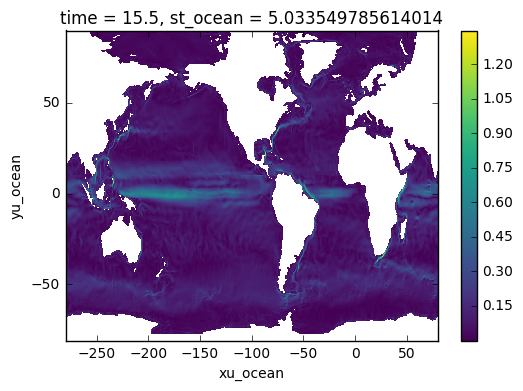

In [13]:
%%time
# Calculations only happen on the chunks you're using, when you actually need the results

%matplotlib inline
magnitude.isel(time=0, st_ocean=0).plot()